WE HAVE GOT THE DATASET OF VIRAT KOHLI 
WE WILL FIRST IMPORT NECESSARY LIBRARIES TO PERFORM OUR TASK

In [367]:
# STEP 1 IS TO IMPORT NECESSARY LIBRARIES
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import statistics as st                     # for statistical checks
from scipy.stats import norm,stats,kurtosis,skew

WE WILL READ THE DATA AND CONVERT IF ANY MISSING DATAS ARE SHOWN IN STRING TO nan FORMAT

In [207]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","-"]
df = pd.read_csv("Virat_Kohli_ODI.csv", na_values = missing_value_formats)



In [208]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33.0,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82.0,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40.0,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87.0,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45.0,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


THIS SHOWS THE FIRST 5 ROWS OF THE DATA 
IT INDICATES SUCCESSFUL READING OF DATA

In [209]:
df.shape

(132, 12)

THIS SHOWS THAT DATA HAS 132 ROWS AND 12 COLUMNS

In [210]:
df.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

THIS DISPLAYS ALL THE COLUMN HEADINGS

# QUESTIONS THAT COME TO MIND WHEN YOU SEE THIS DATA SET

# SINCE 18 AUG 2008 UPTILL 22 JAN 2017 WE HAVE DATA OF 132 MATCHES


# I WANT TO KNOW HOW MANY MATCHES HAS HE PLAYED
# I WANT TO KNOW TOTAL RUNS MADE
# AVERAGE SCORE
# HOW MANY BOUNDARIES
# HOW MANY 6S
# HOW MANY CENTURIES 
# HOW MANY HALF CENTURIES
# BATTING LINE UP TOTAL AND AVERAGE SCORE
# BEST PERFORMANCE WAS AGT WHOM
# WORST PERFORMANCE WAS AGT WHOM
# WHAT IS THE SPREAD OF HIS RUNS
# SPREAD OF RUNRATE
# COUNT OF DIFFERENT DISMISSALS
# IS THERE A CORRELATION BETWEEN TIME SPENT AT CREASE AND RUNS
# IS THERE A CORRELATION BETWEEN BALLS FACED AND RUNS
# IS THERE A CORRELATION BETWEEN TIME SPENT AT CREASE AND DISMISSAL
# COMPETITOR WISE PERFORMANCE
# POSITION WISE PERFORMANCE
# GROUND WISE PERFORMANCE
# WHEN HE HAS HIT A LOT OF SIXERS HAS HE GOT CAUGHT
# WHEN HE HAS SPENT A LOT OF TIME AT CREASE HE HAS A CHANCE OF RUNOUT
# ANNUAL PERFORMANCE NO OF MATCHES, TOTAL SCORE AVERAGE SCORE 



TO UNDERSTAND THE DATA TYPE

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    object 
 1   Mins        126 non-null    float64
 2   BF          132 non-null    int64  
 3   4s          132 non-null    int64  
 4   6s          132 non-null    int64  
 5   SR          131 non-null    float64
 6   Pos         132 non-null    int64  
 7   Dismissal   132 non-null    object 
 8   Inns        132 non-null    int64  
 9   Opposition  132 non-null    object 
 10  Ground      132 non-null    object 
 11  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 12.5+ KB


# cleaning of data required
# there are strings in the data RUNS causing the data to be shown as object 

In [213]:
new= df["Runs"].str.split("*",expand = True)

we split the data to put * aside. stored the data in a variable

In [214]:
new.rename(columns={0:"Runs",1:"string"},inplace=True)

the new variable columns are renamed

we save the rectified runs data into main dataframe

In [215]:
df["Runs"]=new.Runs

now we assign it to be an integer

In [216]:
df['Runs'] = df['Runs'].astype(int)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int32  
 1   Mins        126 non-null    float64
 2   BF          132 non-null    int64  
 3   4s          132 non-null    int64  
 4   6s          132 non-null    int64  
 5   SR          131 non-null    float64
 6   Pos         132 non-null    int64  
 7   Dismissal   132 non-null    object 
 8   Inns        132 non-null    int64  
 9   Opposition  132 non-null    object 
 10  Ground      132 non-null    object 
 11  Start Date  132 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 12.0+ KB


In [218]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

Runs          0
Mins          6
BF            0
4s            0
6s            0
SR            1
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

to check if data has null values 
as in our data frame we can see Mins and SR having null values

#we have defined certain functions for our convenience

In [41]:
def spreadgraph(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
    sns.histplot(x = df[col], ax =ax[1], color = "b",kde=True) # ax[1] means image will plot at the second space
    sns.boxplot(x = df[col], ax = ax[0], color = "m") # ax[0] means image will plot at the second space
    plt.show()

def bargraph(col):
    fig, ax = plt.subplots()
    ax = sns.countplot(x = df[col])
    for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
        percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
        x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                            # get_height: returns height of rectange
        ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
        fig.set_figheight(4)                                                             # annotate: used to annotate over objects, here objects are the bars
        fig.set_figwidth(7)
    plt.show()

# function for unique data, mode and null values for population categorical data
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")
    print(df[col].value_counts())

def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")
    print(f"Max values in the {col} is {df[col].max()}")
    print(f"Min values in the {col} is {df[col].min()}")

# lets seggregate columns into categorical and numerical continuous

In [55]:
# define a function to separate categorical and numerical data
# Separating out the categorical and continuous variables
def separate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 11:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous   

In [56]:
categorical, continuous = separate_data_types(df) # Calling the function
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))
# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format


categorical    continuous
-------------  ------------
6s             Runs
Pos            Mins
Dismissal      BF
Inns           4s
               SR
               Opposition
               Ground
               Start Date


# if we analyse this column 6s that is sixers hit by the batsman we notice that most of the matches that is 69% of matches he has not been able to hit a six, 18% of the matches he has hit 1 six. There was one match he managed to hit 7 sixes.

In [57]:
info_of_cat("6s")

Unique values in 6s are: [0 1 2 7 3 5]
Mode of 6s is 0
Number of missing values in 6s is 0
0    91
1    24
2    11
3     3
5     2
7     1
Name: 6s, dtype: int64


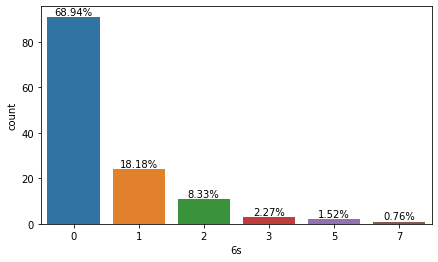

In [58]:
bargraph("6s")

# on analysing column 4s, we come to know that only 28% matches he has not scored a four, rest of the matches he has scored a four as less as 1 boundary (12%) to 18 boundaries in one match.

In [59]:
info_of_cat("4s")

Unique values in 4s are: [ 1  6  4  7  3  0 11  5 10  8  2  9 16 14 12 13 18]
Mode of 4s is 0
Number of missing values in 4s is 0
0     32
1     16
2     13
5     10
3      9
4      8
9      8
7      7
11     6
6      6
8      5
16     3
13     3
12     2
10     2
14     1
18     1
Name: 4s, dtype: int64


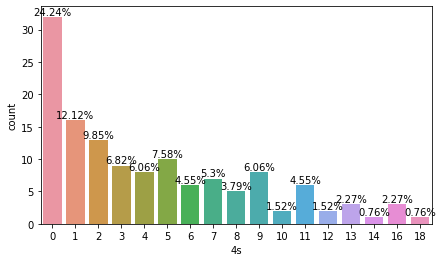

In [60]:
bargraph("4s")

# on analysing which position does Virat kohli is mostly played at we can see he is mostly placed at position 3 , sometimes at 4 , very rarely at 1,2,5,6,7

In [61]:
info_of_cat("Pos")

Unique values in Pos are: [2 1 7 4 3 5 6]
Mode of Pos is 3
Number of missing values in Pos is 0
3    91
4    28
2     3
1     3
7     3
5     3
6     1
Name: Pos, dtype: int64


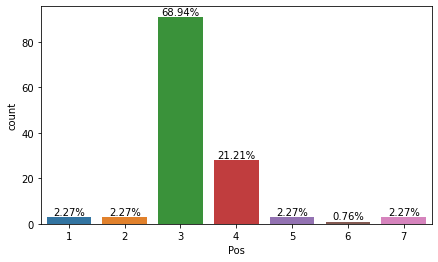

In [62]:
bargraph("Pos")

# MOSTLY HE HAS BEEN DISMISSED AS CAUGHT 63% OF THE TIME, 13% OF THE TIME HE HAS REMAINED NOT OUT, OR ELSE HE HAS BEEN RUN OUT OR BOWLED OR LBW 
ITS VERY RARE THAT HE HAS BEEN STUMPED OR HIT WICKET

In [63]:
info_of_cat("Dismissal")

Unique values in Dismissal are: ['lbw' 'caught' 'run out' 'bowled' 'not out' 'stumped' 'hit wicket']
Mode of Dismissal is caught
Number of missing values in Dismissal is 0
caught        84
not out       17
run out       10
bowled        10
lbw            9
stumped        1
hit wicket     1
Name: Dismissal, dtype: int64


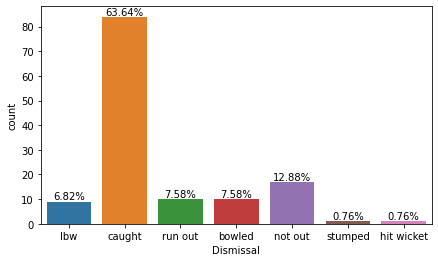

In [64]:
bargraph("Dismissal")

In [65]:
info_of_cat("Inns")

Unique values in Inns are: [1 2]
Mode of Inns is 2
Number of missing values in Inns is 0
2    76
1    56
Name: Inns, dtype: int64


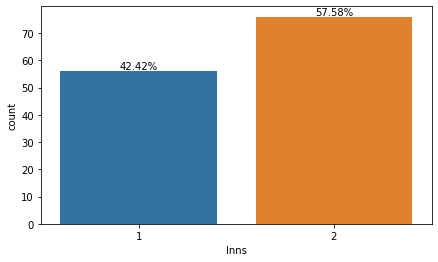

In [66]:
bargraph("Inns")

In [67]:
info_of_cat("Opposition")

Unique values in Opposition are: ['v Sri Lanka' 'v Australia' 'v Bangladesh' 'v South Africa' 'v Zimbabwe'
 'v New Zealand' 'v Ireland' 'v Netherlands' 'v West Indies' 'v Pakistan'
 'v England']
Mode of Opposition is v Sri Lanka
Number of missing values in Opposition is 0
v Sri Lanka       24
v England         21
v Australia       20
v West Indies     19
v South Africa    15
v New Zealand     14
v Bangladesh       8
v Zimbabwe         5
v Pakistan         4
v Ireland          1
v Netherlands      1
Name: Opposition, dtype: int64


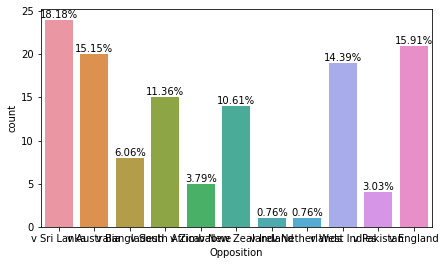

In [68]:
bargraph("Opposition")

In [69]:
info_of_cat("Ground")

Unique values in Ground are: ['Dambulla' 'Colombo (RPS)' 'Vadodara' 'Mohali' 'Rajkot' 'Nagpur'
 'Kolkata' 'Dhaka' 'Jaipur' 'Ahmedabad' 'Bulawayo' 'Harare'
 'Visakhapatnam' 'Guwahati' 'Bengaluru' 'Chennai' 'Durban' 'Johannesburg'
 'Cape Town' 'Port Elizabeth' 'Centurion' 'Delhi' 'Mumbai' 'Port of Spain'
 'North Sound' 'Kingston' 'Southampton' 'The Oval' 'Cardiff'
 'Hyderabad (Deccan)' 'Cuttack' 'Indore' 'Melbourne' 'Adelaide' 'Brisbane'
 'Sydney' 'Hambantota' 'Pallekele' 'Kochi' 'Ranchi' 'Dharamsala'
 'Birmingham' 'Pune' 'Kanpur' 'Napier' 'Hamilton' 'Wellington' 'Fatullah'
 'Nottingham' 'Leeds' 'Perth' 'Canberra']
Mode of Ground is Dhaka
Number of missing values in Ground is 0
Dhaka                 7
Dambulla              6
Colombo (RPS)         6
Mohali                6
Kolkata               5
Chennai               5
Delhi                 5
Ahmedabad             4
Harare                4
Visakhapatnam         4
Nagpur                3
Port of Spain         3
Dharamsala            3
Ran

In [70]:
info_of_numerical("Runs")

The mean of the Runs is 46.84848484848485
The median of the Runs is 32.5
The mode of the Runs is 0
The standard deviation of the Runs is 41.994635216891325
Number of missing values in the Runs is 0
Max values in the Runs is 154
Min values in the Runs is 0


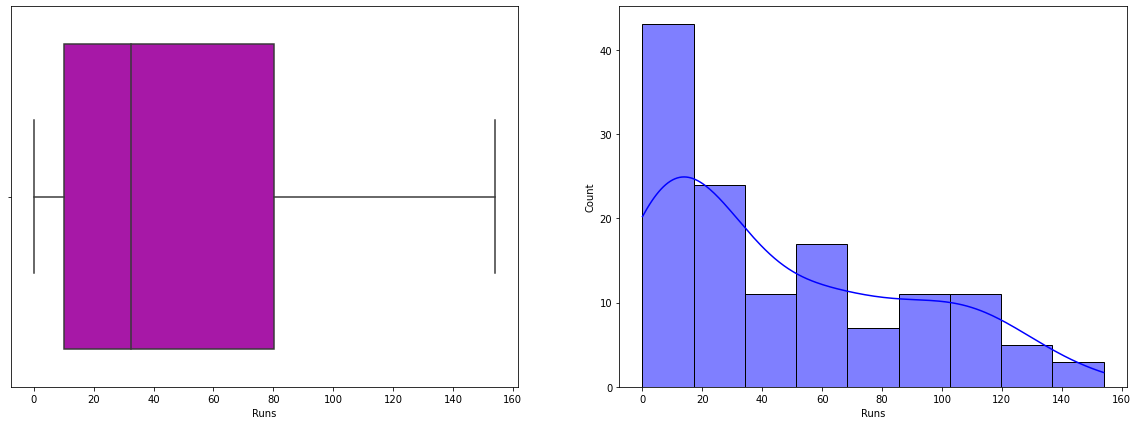

In [71]:
spreadgraph("Runs")

In [72]:
info_of_numerical("Mins")

The mean of the Mins is 70.4920634920635
The median of the Mins is 56.0
The mode of the Mins is 9.0
The standard deviation of the Mins is 57.27013127720189
Number of missing values in the Mins is 6
Max values in the Mins is 202.0
Min values in the Mins is 1.0


In [ ]:
runs_scored=pd.DataFrame((df.Runs))


In [76]:
runs_bins= pd.cut(x=df['Runs'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120])

In [77]:
runs_bins

0      (10.0, 20.0]
1      (30.0, 40.0]
2      (20.0, 30.0]
3      (50.0, 60.0]
4      (30.0, 40.0]
           ...     
127    (40.0, 50.0]
128    (60.0, 70.0]
129             NaN
130     (0.0, 10.0]
131    (50.0, 60.0]
Name: Runs, Length: 132, dtype: category
Categories (12, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (80, 90] < (90, 100] < (100, 110] < (110, 120]]

In [369]:
runs_bins=pd.DataFrame(runs_bins.value_counts(),reset_index)

In [377]:
runs_bins.rename(columns={0:"Runs_bins"},inplace=True)


In [378]:
runs_bins

,Runs
"(0, 10]",24
"(20, 30]",15
"(10, 20]",13
"(30, 40]",13
"(60, 70]",9
"(50, 60]",8
"(100, 110]",7
"(80, 90]",6
"(90, 100]",6
"(110, 120]",6


# Finding Data in mins which is null and assigning the correct values by seggregating that to score a particular score on an average batsman has spent how much time

In [219]:
df.loc[df.Mins.isnull()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
10,107,NaN,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09
13,31,NaN,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,21-Feb-10
14,57,NaN,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,27-Feb-10
51,86,NaN,99,11,0,86.86,4,not out,2,v England,Mumbai,23-Oct-11
105,49,NaN,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,6-Nov-14
106,53,NaN,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),9-Nov-14


In [220]:
a=df[(df.Runs>100) & (df.Runs <110)]["Mins"].mean()

In [221]:
df[(df.Runs>100) & (df.Runs <110)]["Mins"].median()

129.5

In [223]:
b=df[(df.Runs>80) & (df.Runs <90)]["Mins"].mean()

In [224]:
df[(df.Runs>80) & (df.Runs <90)]["Mins"].median()

120.0

In [226]:
c=df[(df.Runs>50) & (df.Runs <60)]["Mins"].mean()

In [227]:
d=df[(df.Runs>40) & (df.Runs <50)]["Mins"].mean()

In [228]:
e=df[(df.Runs>30) & (df.Runs <40)]["Mins"].mean()

In [229]:
df.Mins[10]=a

C:\Users\CLYDEA~1\AppData\Local\Temp/ipykernel_15460/797726646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Mins[10]=a


In [230]:
df.Mins[10]

133.5

In [231]:
df.Mins[51]=b

C:\Users\CLYDEA~1\AppData\Local\Temp/ipykernel_15460/1241544963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Mins[51]=b


In [232]:
df.Mins[13]=e

C:\Users\CLYDEA~1\AppData\Local\Temp/ipykernel_15460/3968328783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Mins[13]=e


In [233]:
df.Mins[14]=c

C:\Users\CLYDEA~1\AppData\Local\Temp/ipykernel_15460/2341580066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Mins[14]=c


In [234]:
df.Mins[106]=c

C:\Users\CLYDEA~1\AppData\Local\Temp/ipykernel_15460/496540065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Mins[106]=c


In [235]:
df.Mins[105]=d

C:\Users\CLYDEA~1\AppData\Local\Temp/ipykernel_15460/708003995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Mins[105]=d


In [236]:
df.loc[df.Mins.isnull()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date


# missing data in Mins has been duly filled

# an analysis of this shows that on an average the batsman spends 65-72 mins on crease if he has not got out within 9 mins.

In [237]:
info_of_numerical("Mins")

The mean of the Mins is 71.70562442607898
The median of the Mins is 64.5
The mode of the Mins is 9.0
The standard deviation of the Mins is 56.4838371807021
Number of missing values in the Mins is 0
Max values in the Mins is 202.0
Min values in the Mins is 1.0


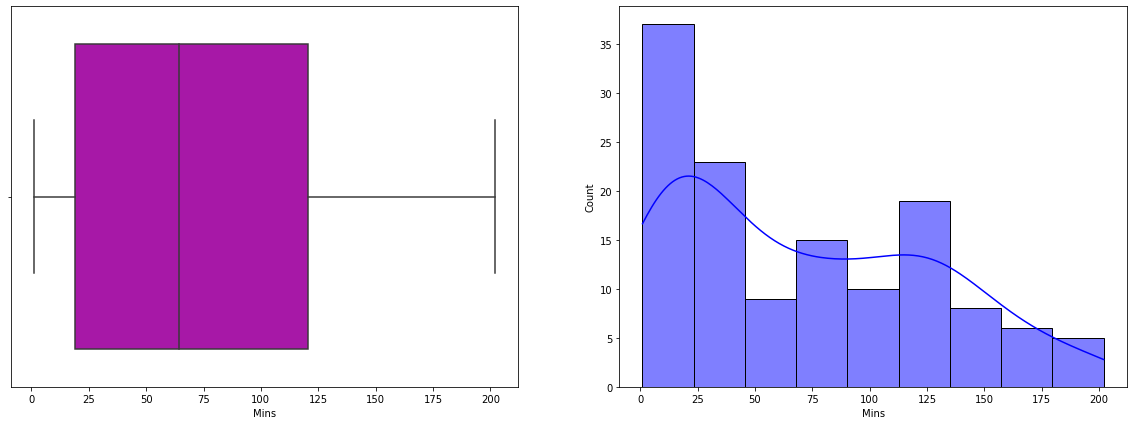

In [114]:
spreadgraph("Mins")

In [115]:
info_of_numerical("BF")

The mean of the BF is 50.871212121212125
The median of the BF is 42.5
The mode of the BF is 5
The standard deviation of the BF is 38.729716248082056
Number of missing values in the BF is 0
Max values in the BF is 140
Min values in the BF is 0


In [380]:
# the batsman on an average has faced 40-50 balls unless got out

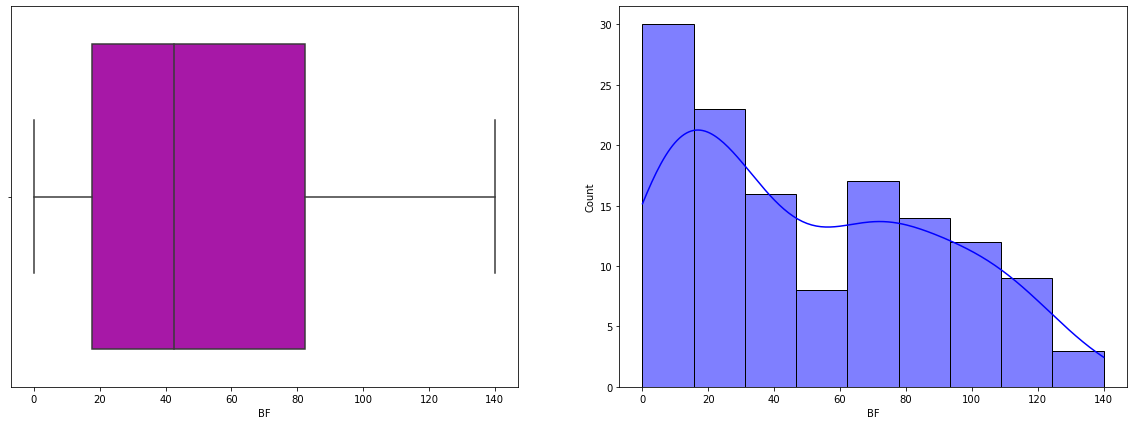

In [116]:
spreadgraph("BF")

In [157]:
info_of_numerical("SR")

The mean of the SR is 77.57893129770991
The median of the SR is 78.78
The mode of the SR is 0.0
The standard deviation of the SR is 37.410776301280826
Number of missing values in the SR is 1
Max values in the SR is 209.09
Min values in the SR is 0.0


In [381]:
# The strike rate of batsman is 78 that is for 100 balls faced he has scored 78 on an average

In [ ]:
# based on this changed the sr column 

In [ ]:
# realised that missing value is actually 0 

In [158]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33.0,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82.0,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40.0,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87.0,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45.0,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [162]:
strike_rate=np.round(df.Runs/df.BF*100,2)

In [163]:
df.SR=strike_rate

In [164]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33.0,22,1,0,54.55,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82.0,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40.0,38,4,0,65.79,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87.0,66,7,0,81.82,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45.0,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [165]:
info_of_numerical("SR")

The mean of the SR is 77.58290076335881
The median of the SR is 78.79
The mode of the SR is 0.0
The standard deviation of the SR is 37.41173002987883
Number of missing values in the SR is 1
Max values in the SR is 209.09
Min values in the SR is 0.0


In [238]:
df.loc[df.SR.isnull()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
15,0,3.0,0,0,0,NaN,3,run out,1,v Zimbabwe,Bulawayo,28-May-10


In [239]:
df.SR[15]=0

C:\Users\CLYDEA~1\AppData\Local\Temp/ipykernel_15460/210346122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SR[15]=0


In [240]:
df.loc[df.SR.isnull()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date


In [241]:
virat=df

In [242]:
virat.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33.0,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82.0,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40.0,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87.0,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45.0,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [169]:
info_of_numerical("SR")

The mean of the SR is 76.99515151515155
The median of the SR is 78.715
The mode of the SR is 0.0
The standard deviation of the SR is 37.875487843276424
Number of missing values in the SR is 0
Max values in the SR is 209.09
Min values in the SR is 0.0


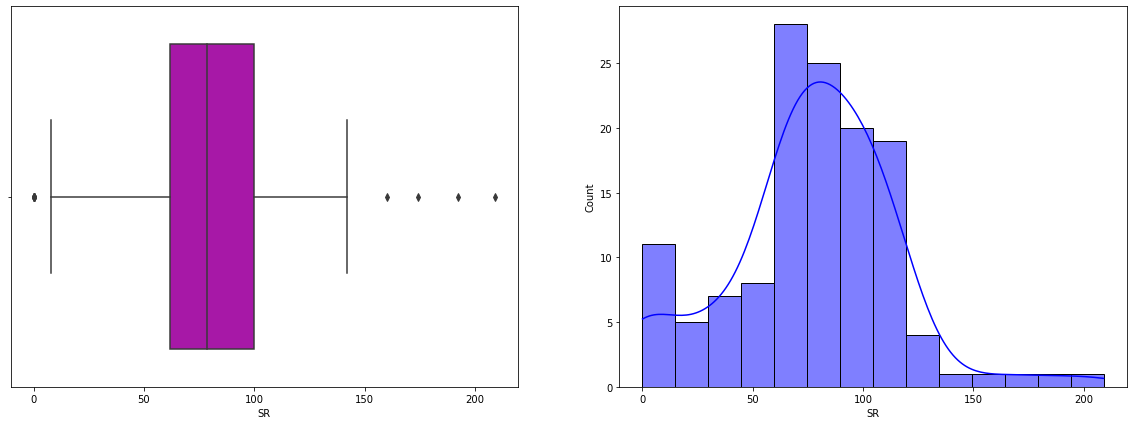

In [170]:
spreadgraph("SR")

In [ ]:
# there are a few outliers showing exceptional performance but data is normally distributed showing reliability in performance 
# where we see a strike rate of 77 is expected in most cases subject to balls faced

In [ ]:
# I WANT TO KNOW HOW MANY MATCHES HAS HE PLAYED
# I WANT TO KNOW TOTAL RUNS MADE
# AVERAGE SCORE
# HOW MANY BOUNDARIES
# HOW MANY 6S
# HOW MANY CENTURIES 
# HOW MANY HALF CENTURIES
# BATTING LINE UP TOTAL AND AVERAGE SCORE
# BEST PERFORMANCE WAS AGT WHOM
# WORST PERFORMANCE WAS AGT WHOM
# WHAT IS THE SPREAD OF HIS RUNS
# SPREAD OF RUNRATE
# COUNT OF DIFFERENT DISMISSALS
# IS THERE A CORRELATION BETWEEN TIME SPENT AT CREASE AND RUNS
# IS THERE A CORRELATION BETWEEN BALLS FACED AND RUNS
# IS THERE A CORRELATION BETWEEN TIME SPENT AT CREASE AND DISMISSAL
# COMPETITOR WISE PERFORMANCE
# POSITION WISE PERFORMANCE
# GROUND WISE PERFORMANCE
# WHEN HE HAS HIT A LOT OF SIXERS HAS HE GOT CAUGHT
# WHEN HE HAS SPENT A LOT OF TIME AT CREASE HE HAS A CHANCE OF RUNOUT
# ANNUAL PERFORMANCE NO OF MATCHES, TOTAL SCORE AVERAGE SCORE 


In [120]:
# I WANT TO KNOW HOW MANY MATCHES HAS HE PLAYED
print("Number of Matches played by Virat from Aug 8 till Aug 17:",df.shape[0]-1)

Number of Matches played by Virat from Aug 8 till Aug 17: 131


In [123]:
# I WANT TO KNOW TOTAL RUNS MADE
print("Runs scored by Virat from Aug 8 till Aug 17:",df["Runs"].sum())

Runs scored by Virat from Aug 8 till Aug 17: 6184


In [125]:
# AVERAGE SCORE
print(" Average Runs scored by Virat from Aug 8 till Aug 17:",np.round(df["Runs"].mean(),2))

 Average Runs scored by Virat from Aug 8 till Aug 17: 46.85


In [127]:
# HOW MANY BOUNDARIES
print(" Boundaries scored by Virat from Aug 8 till Aug 17:",np.round(df["4s"].sum(),2))

 Boundaries scored by Virat from Aug 8 till Aug 17: 577


In [128]:
# HOW MANY SIXERS
print(" Sixers scored by Virat from Aug 8 till Aug 17:",np.round(df["6s"].sum(),2))

 Sixers scored by Virat from Aug 8 till Aug 17: 72


In [143]:
# HOW MANY CENTURIES 
print(" Centuries scored by Virat from Aug 8 till Aug 17:",df["Runs"][df.Runs>99].count())

 Centuries scored by Virat from Aug 8 till Aug 17: 23


In [145]:
# HOW MANY HALF CENTURIES
print(" Half Centuries scored by Virat from Aug 8 till Aug 17:",df["Runs"][(df.Runs>49)&(df.Runs<99)].count())

 Half Centuries scored by Virat from Aug 8 till Aug 17: 30


In [186]:
# BATTING LINE UP TOTAL AND AVERAGE SCORE
# POSITION WISE PERFORMANCE
df["Runs"].groupby(df["Pos"]).aggregate(["count","sum" ,"mean"]).sort_values("mean")

,count,sum,mean
Pos,,,
7,3,30,10.000000
2,3,51,17.000000
6,1,23,23.000000
1,3,110,36.666667
5,3,123,41.000000
4,28,1370,48.928571
3,91,4477,49.197802


In [154]:
# BEST PERFORMANCE WAS AGT WHOM 
# WORST PERFORMANCE WAS AGT WHOM.
# COMPETITOR WISE PERFORMACE

df["Runs"].groupby(df["Opposition"]).aggregate(["count","sum" ,"mean"]).sort_values("mean")

,count,sum,mean
Opposition,,,
v Pakistan,4,22,5.500000
v Netherlands,1,12,12.000000
v Ireland,1,34,34.000000
v South Africa,15,558,37.200000
v England,21,830,39.523810
v Zimbabwe,5,215,43.000000
v Sri Lanka,24,1084,45.166667
v Australia,20,999,49.950000
v West Indies,19,1009,53.105263


In [190]:
# GROUND WISE BEST PERFORMANCE 
df["Runs"].groupby(df["Ground"]).aggregate(["count","sum" ,"mean"]).sort_values("mean",ascending=False).head()

,count,sum,mean
Ground,,,
Fatullah,1,136,136.00
Napier,1,123,123.00
Canberra,1,106,106.00
Guwahati,1,105,105.00
Visakhapatnam,4,399,99.75


In [191]:
# GROUND WISE WORST PERFORMANCE 
df["Runs"].groupby(df["Ground"]).aggregate(["count","sum" ,"mean"]).sort_values("mean").head()

,count,sum,mean
Ground,,,
Bulawayo,1,0,0.0
Centurion,1,2,2.0
The Oval,1,7,7.0
Southampton,1,9,9.0
Sydney,3,30,10.0


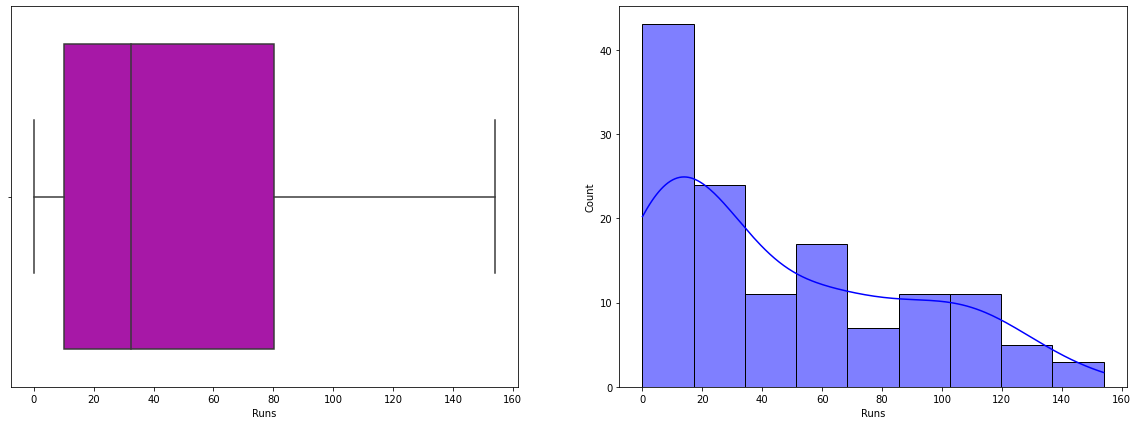

In [155]:
# WHAT IS THE SPREAD OF HIS RUNS
spreadgraph("Runs")

In [156]:
df.Runs.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [ ]:
# Right skewed data
# there are no outliers

In [179]:
# COUNT OF DIFFERENT DISMISSALS
df["Dismissal"].groupby(df["Dismissal"]).value_counts()

Dismissal   Dismissal 
bowled      bowled        10
caught      caught        84
hit wicket  hit wicket     1
lbw         lbw            9
not out     not out       17
run out     run out       10
stumped     stumped        1
Name: Dismissal, dtype: int64

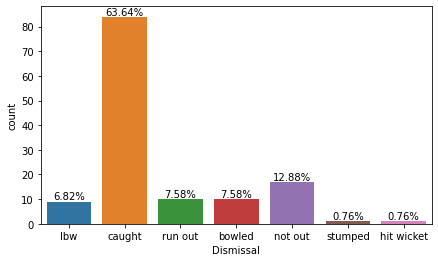

In [180]:
bargraph("Dismissal")

In [182]:
# IS THERE A CORRELATION BETWEEN TIME SPENT AT CREASE AND RUNS
# using pearsons correlation coefficient
x=df.Mins
y=df.Runs

correlation = np.corrcoef(x, y)[0]
#print the result
print("The correlation between Runs scored and Time spent at crease is : \n ",correlation)

The correlation between Runs scored and Time spent at crease is : 
  [1.         0.94748835]


In [184]:
# IS THERE A CORRELATION BETWEEN TIME SPENT AT CREASE AND Balls Faced
# using pearsons correlation coefficient
x=df.Mins
y=df.BF

correlation = np.corrcoef(x, y)[0]
#print the result
print("The correlation between Time spent at crease and Balls Faced is : \n ",correlation)

The correlation between Time spent at crease and Balls Faced is : 
  [1.         0.97750622]


In [185]:
# IS THERE A CORRELATION BETWEEN runs scored AND Balls Faced
x=df.Runs
y=df.BF

correlation = np.corrcoef(x, y)[0]
#print the result
print("The correlation between Runs scored and Balls Faced is : \n ",correlation)

The correlation between Runs scored and Balls Faced is : 
  [1.         0.96163938]


In [249]:
sixes=df[df["6s"]>0]

In [256]:
no_of_6=df["6s"][df["6s"]>0].count()# in 41 matches we find he has hit 6s out of 131 matches

In [257]:
no_of_6

41

In [251]:
sixes["Dismissal"].value_counts()

caught        25
not out       11
lbw            2
hit wicket     1
bowled         1
run out        1
Name: Dismissal, dtype: int64

In [254]:
sixes["Opposition"].value_counts()

v New Zealand     8
v Sri Lanka       6
v Australia       6
v England         6
v South Africa    5
v West Indies     5
v Bangladesh      3
v Zimbabwe        2
Name: Opposition, dtype: int64

In [255]:
sixes["Pos"].value_counts()

3    34
4     6
1     1
Name: Pos, dtype: int64

In [252]:
fours=df[df["4s"]>0]

In [253]:
fours["Dismissal"].value_counts()

caught        61
not out       15
lbw            8
run out        7
bowled         7
stumped        1
hit wicket     1
Name: Dismissal, dtype: int64

In [ ]:
# MOST OF THE DISMISSAL IS AS CAUGHT LETS ANALYSE WHY IS HE GETTING CAUGHT

In [193]:
v_caught=df[df.Dismissal =="caught"]

In [194]:
v_caught

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
1,37,82.0,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
6,30,53.0,41,3,0,73.17,4,caught,2,v Australia,Vadodara,25-Oct-09
7,10,32.0,16,1,0,62.50,3,caught,2,v Australia,Mohali,2-Nov-09
10,107,133.5,114,11,1,93.86,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09
11,91,136.0,102,7,0,89.22,3,caught,2,v Bangladesh,Dhaka,7-Jan-10
...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64.0,51,2,1,88.24,3,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,152.0,76,2,1,85.53,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,147.0,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17
130,8,6.0,5,2,0,160.00,3,caught,1,v England,Cuttack,19-Jan-17


In [195]:
v_caught["Inns"].value_counts()

2    52
1    32
Name: Inns, dtype: int64

In [196]:
v_caught.shape[0]

84

In [197]:
v_caught["Opposition"].value_counts()

v Australia       15
v England         14
v Sri Lanka       13
v South Africa    12
v New Zealand     11
v West Indies     11
v Zimbabwe         3
v Pakistan         3
v Bangladesh       2
Name: Opposition, dtype: int64

In [199]:
v_caught["Pos"].value_counts()

3    63
4    16
2     2
5     2
7     1
Name: Pos, dtype: int64

In [200]:
df=v_caught

In [201]:
info_of_numerical("Runs")

The mean of the Runs is 42.05952380952381
The median of the Runs is 30.5
The mode of the Runs is 0
The standard deviation of the Runs is 39.724154647029465
Number of missing values in the Runs is 0
Max values in the Runs is 138
Min values in the Runs is 0


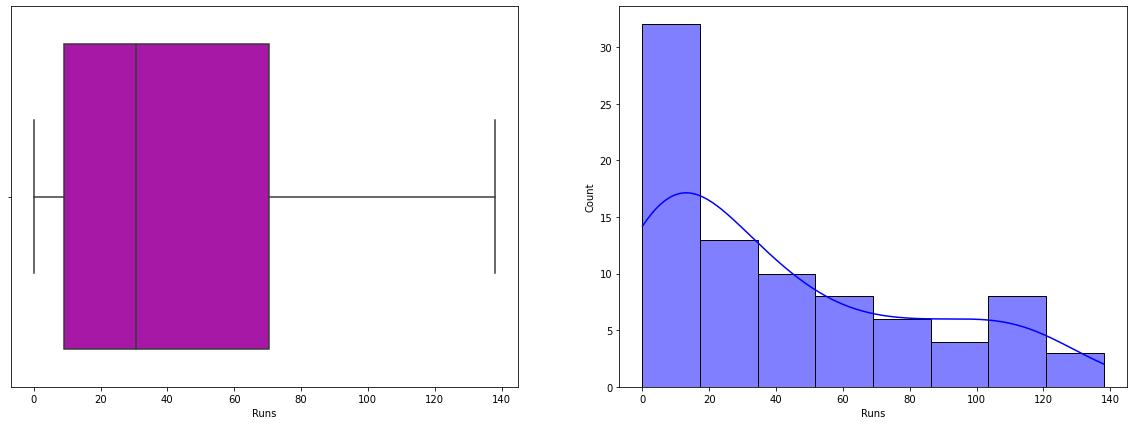

In [202]:
spreadgraph("Runs")

In [203]:
info_of_numerical("Mins")

The mean of the Mins is 67.76527777777778
The median of the Mins is 52.0
The mode of the Mins is 11.0
The standard deviation of the Mins is 56.436161480735095
Number of missing values in the Mins is 0
Max values in the Mins is 202.0
Min values in the Mins is 1.0


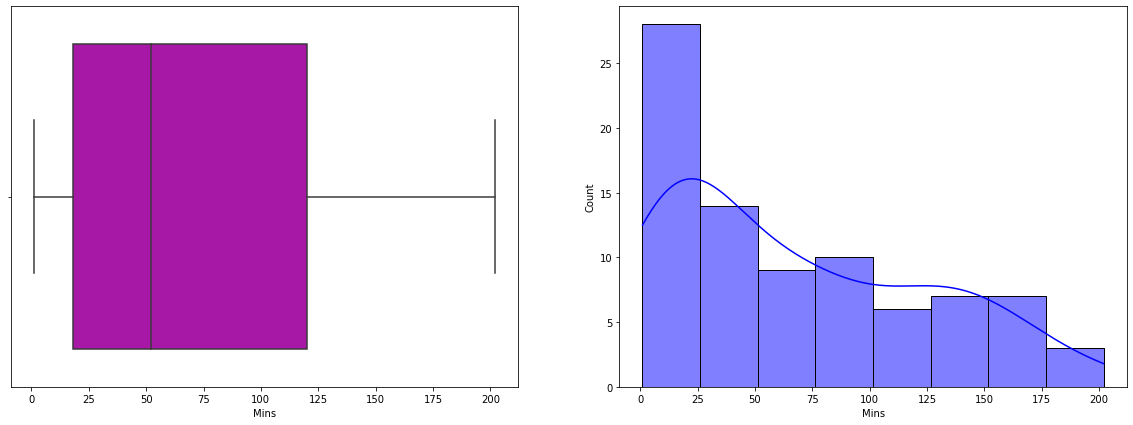

In [204]:
spreadgraph("Mins")

In [205]:
info_of_numerical("BF")

The mean of the BF is 47.845238095238095
The median of the BF is 34.5
The mode of the BF is 5
The standard deviation of the BF is 38.323132794325986
Number of missing values in the BF is 0
Max values in the BF is 140
Min values in the BF is 1


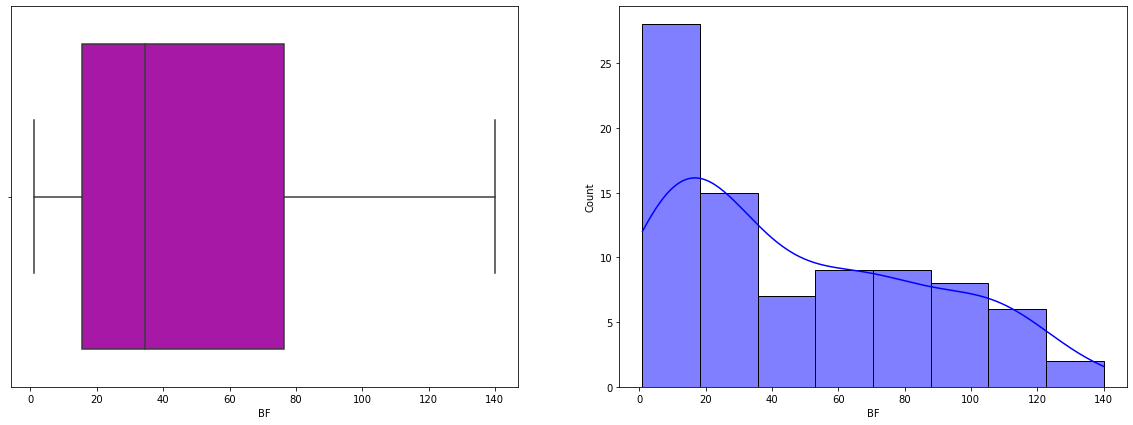

In [206]:
spreadgraph("BF")

In [268]:
# considering the entire data
# probability if he has hit a 4 then he will definitely hit a 6

print("probability he will hit a six:",np.round(df["6s"][df["6s"]>0].count()/df.shape[0],2)*100)
print("probability he will hit only 1 six:",np.round(df["6s"][df["6s"]==1].count()/df.shape[0],2)*100)
print("probability he will hit more than 1 six:",np.round(df["6s"][df["6s"]>1].count()/df.shape[0],2)*100)


print("probability he will hit a four:",np.round(df["4s"][df["4s"]>0].count()/df.shape[0],2)*100)
print("probability he will hit only 1 four:",np.round(df["4s"][df["4s"]==1].count()/df.shape[0],2)*100)
print("probability he will hit more than 1 four:",np.round(df["4s"][df["4s"]>1].count()/df.shape[0],2)*100)


print("probability he will hit a six and a four :",np.round(df["4s"][(df["4s"]>0)&(df["6s"]>0)].count()/df.shape[0],2)*100)
print("probability he will hit a four and no six :",np.round(df["4s"][(df["4s"]>0)&(df["6s"]==0)].count()/df.shape[0],2)*100)


# probability that if he has made a half century then he definitely will make a century
print("probability he will make a century:",np.round(df["Runs"][df["Runs"]>99].count()/df.shape[0],2)*100)
print("probability he will make half century:",np.round(df["Runs"][df["Runs"]>49].count()/df.shape[0],2)*100)
print("probability he will make half century but not a century:",np.round(df["Runs"][(df["Runs"]>49)&(df["Runs"]<99)].count()/df.shape[0],2)*100)



probability he will hit a six: 31.0
probability he will hit only 1 six: 18.0
probability he will hit more than 1 six: 13.0
probability he will hit a four: 76.0
probability he will hit only 1 four: 12.0
probability he will hit more than 1 four: 64.0
probability he will hit a six and a four : 30.0
probability he will hit a four and no six : 46.0
probability he will make a century: 17.0
probability he will make half century: 41.0
probability he will make half century but not a century: 23.0


In [308]:
# considering his game against opponents
x=df["Opposition"].unique()

x

array(['v Sri Lanka', 'v Australia', 'v Bangladesh', 'v South Africa',
       'v Zimbabwe', 'v New Zealand', 'v Ireland', 'v Netherlands',
       'v West Indies', 'v Pakistan', 'v England'], dtype=object)

In [316]:
# lets make a probability table
detail=("Number of matches played ","probability he will hit a six:",
       "probability he will hit only 1 six:","probability he will hit more than 1 six:",
       "probability he will hit a four:","probability he will hit only 1 four:","probability he will hit more than 1 four:",
"probability he will hit a six and a four :","probability he will hit a four and no six :","probability he will make a century:",
       "probability he will make half century:","probability he will make half century but not a century:")

In [317]:
prob_table=pd.DataFrame()

In [313]:
prob_table["Details"]=detail

In [314]:
for i in x:

    
    match=df["Opposition"][df["Opposition"]==i].count()

    a=np.round(df["6s"][(df["6s"]>0) & (df["Opposition"]==i)].count()/match,2)*100
    b=np.round(df["6s"][(df["6s"]==1)& (df["Opposition"]==i)].count()/match,2)*100
    c=np.round(df["6s"][(df["6s"]>1)& (df["Opposition"]==i)].count()/match,2)*100
    d=np.round(df["4s"][(df["4s"]>0) & (df["Opposition"]==i)].count()/match,2)*100
    e=np.round(df["4s"][(df["4s"]==1) & (df["Opposition"]==i)].count()/match,2)*100
    s=np.round(df["4s"][(df["4s"]>1) & (df["Opposition"]==i)].count()/match,2)*100
    g=np.round(df["4s"][(df["4s"]>0)&(df["6s"]>0)& (df["Opposition"]==i)].count()/match,2)*100
    h=np.round(df["4s"][(df["4s"]>0)&(df["6s"]==0)& (df["Opposition"]==i)].count()/match,2)*100
    p=np.round(df["Runs"][(df["Runs"]>99)& (df["Opposition"]==i)].count()/match,2)*100
    q=np.round(df["Runs"][(df["Runs"]>49) & (df["Opposition"]==i)].count()/match,2)*100
    r=np.round(df["Runs"][(df["Runs"]>49)&(df["Runs"]<99)& (df["Opposition"]==i)].count()/match,2)*100
    prob_table[i]=(match,a,b,c,d,e,s,g,h,p,q,r)

In [315]:
prob_table

,Details,v Sri Lanka,v Australia,v Bangladesh,v South Africa,v Zimbabwe,v New Zealand,v Ireland,v Netherlands,v West Indies,v Pakistan,v England
0,Number of matches played,24.0,20.0,8.0,15.0,5.0,14.0,1.0,1.0,19.0,4.0,21.0
1,probability he will hit a six:,25.0,30.0,38.0,33.0,40.0,57.0,0.0,0.0,26.0,0.0,29.0
2,probability he will hit only 1 six:,17.0,20.0,12.0,20.0,40.0,29.0,0.0,0.0,11.0,0.0,19.0
3,probability he will hit more than 1 six:,8.0,10.0,25.0,13.0,0.0,29.0,0.0,0.0,16.0,0.0,10.0
4,probability he will hit a four:,88.0,80.0,88.0,60.0,80.0,79.0,100.0,100.0,74.0,50.0,67.0
5,probability he will hit only 1 four:,8.0,20.0,12.0,13.0,20.0,7.0,0.0,0.0,5.0,50.0,10.0
6,probability he will hit more than 1 four:,79.0,60.0,75.0,47.0,60.0,71.0,100.0,100.0,68.0,0.0,57.0
7,probability he will hit a six and a four :,25.0,30.0,38.0,27.0,40.0,57.0,0.0,0.0,21.0,0.0,29.0
8,probability he will hit a four and no six :,62.0,50.0,50.0,33.0,40.0,21.0,100.0,100.0,53.0,50.0,38.0
9,probability he will make a century:,17.0,25.0,38.0,7.0,20.0,21.0,0.0,0.0,16.0,0.0,14.0


In [321]:
# if he spends more than average time at crease what kind of dismissal do you see?

avg=np.round(df["Mins"].mean(),0)

In [336]:
avg_time=df[df["Mins"]>72]

In [337]:
avg_time["Dismissal"].value_counts() 

caught        33
not out       14
run out        5
bowled         4
lbw            2
hit wicket     1
Name: Dismissal, dtype: int64

In [ ]:
# probability of his dismissal

In [332]:
tot=df["Mins"][df["Mins"]>72].count()# total 59 matches he stayed beyond his average time spent at crease

In [345]:
print("Probability of getting caught if he stays beyond his average time at crease",np.round((avg_time["Dismissal"].value_counts()[0]/tot)*100,0))

print("Probability of not getting out if he stays beyond his average time at crease",np.round((avg_time["Dismissal"].value_counts()[1]/tot)*100,0))

print("Probability of getting run out if he stays beyond his average time at crease",np.round((avg_time["Dismissal"].value_counts()[2]/tot)*100,0))

print("Probability of getting bowled if he stays beyond his average time at crease",np.round((avg_time["Dismissal"].value_counts()[3]/tot)*100,0))

print("Probability of getting LBW if he stays beyond his average time at crease",np.round((avg_time["Dismissal"].value_counts()[4]/tot)*100,0))

print("Probability of getting hit wicket if he stays beyond his average time at crease",np.round((avg_time["Dismissal"].value_counts()[5]/tot)*100,0))


Probability of getting caught if he stays beyond his average time at crease 56.0
Probability of not getting out if he stays beyond his average time at crease 24.0
Probability of getting run out if he stays beyond his average time at crease 8.0
Probability of getting bowled if he stays beyond his average time at crease 7.0
Probability of getting LBW if he stays beyond his average time at crease 3.0
Probability of getting hit wicket if he stays beyond his average time at crease 2.0


In [348]:
avg_time=df[df["Mins"]<72]

In [366]:
tot=avg_time["Mins"].count()
tot

73

In [350]:
avg_time["Dismissal"].value_counts()

caught     51
lbw         7
bowled      6
run out     5
not out     3
stumped     1
Name: Dismissal, dtype: int64

In [353]:
print("Probability of getting caught if he stays below his average time at crease",np.round((avg_time["Dismissal"].value_counts()[0]/tot)*100,0))

print("Probability of getting LBW if he stays below his average time at crease",np.round((avg_time["Dismissal"].value_counts()[1]/tot)*100,0))

print("Probability of getting bowled if he stays below his average time at crease",np.round((avg_time["Dismissal"].value_counts()[2]/tot)*100,0))

print("Probability of getting runout if he stays below his average time at crease",np.round((avg_time["Dismissal"].value_counts()[3]/tot)*100,0))

print("Probability of getting not out if he stays below his average time at crease",np.round((avg_time["Dismissal"].value_counts()[4]/tot)*100,0))

print("Probability of getting stumped if he stays below his average time at crease",np.round((avg_time["Dismissal"].value_counts()[5]/tot)*100,0))


Probability of getting caught if he stays below his average time at crease 70.0
Probability of getting LBW if he stays below his average time at crease 10.0
Probability of getting bowled if he stays below his average time at crease 8.0
Probability of getting runout if he stays below his average time at crease 7.0
Probability of getting not out if he stays below his average time at crease 4.0
Probability of getting stumped if he stays below his average time at crease 1.0
